# Population to Sample and Back Again: An Exploration of Inferential Statistics

The field of statistics is often divided into two main branches: **descriptive** and **inferential**. 

Inferential statistics is often thought of as the more interesting kind, as it allows us to generalize and make claims beyond the observed data. Notice the key word here–*generalize*. Inferential statistics is a form of *generalization* as it uses specific instances to make more general claims. Generalization is a form of **inductive reasoning**, in which the conclusion of an argument is not guaranteed to be true given the premises. Inductive reasoning is contrasted by **deductive reasoning**, where conclusions are guaranteed to be true.

As a form of induction, individual claims in inferential statistics are not necessarily true. However, what makes inferential statistics unique *and so powerful* is that it is based in probability theory: given the assumptions, we can deduce precisely how often our procedures produce correct claims.

This leads to our key question:
> ⭐ How does inferential statistics allow us to make inductive generalizations while quantifying their reliability through deduction?

In this demonstration, I will explain why, to make inductive claims (**sample → population**) with quantifiable reliability, we first must understand the reverse, deductive process: **population → sample**.

To make this concrete, we will explore a simple simulation.

In [1]:
import seaborn as sns
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt
import math

### The Setup

Our population of interest is exponential with unknown scale parameter. Our goal is to use a random sample from this population to make a claim about the true value of this parameter. Thus, our goal is to generalize information about a sample to the population.  Since the population mean is equal to the scale parameter in an exponential distribution, we will use the sample mean as our estimate. Since this estimate is not guaranteed to be true, we would like to quantify our uncertainty about it.

### Population → Sample

Imagine the scale parameter of the population of interest is known. For our example, let's imagine it is 0.5. The following code graphs the probabilty density function for such a population.

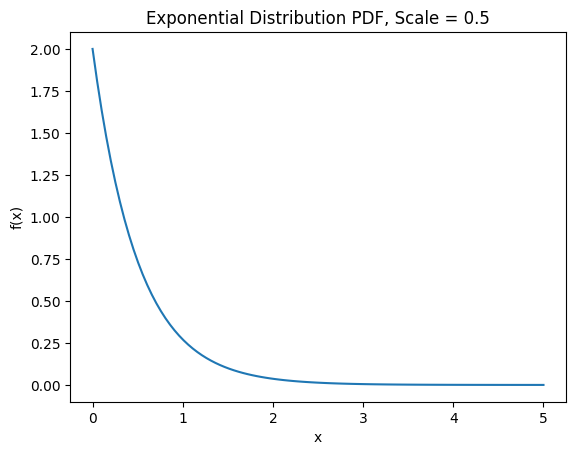

In [2]:
my_rate = 2
my_scale = 1 / my_rate
my_expon = expon(loc = 0, scale = my_scale)
x_values = np.linspace(0, 5, 100)
my_expon_pdf = my_expon.pdf(x_values)
sns.lineplot(x = x_values, y = my_expon_pdf)
plt.title(f'Exponential Distribution PDF, Scale = {my_scale}')
plt.xlabel('x')
plt.ylabel('f(x)');

Recall that for our purposes we will draw a random sample from the population of interest and use the sample mean as our estimate for the population scale parameter. Let's see what a random sample looks like:

Random sample of size 100: [2.27471862 2.14878444 0.12914334 0.08859463 0.35698701 1.12089341
 0.80320436 1.15348506 0.22194253 2.20918872 0.51179644 0.54208502
 0.62674153 1.29136569 0.09168587 0.01510105 0.52254672 0.28132504
 0.44373528 0.81702969 0.12261589 1.37742875 0.40426431 0.10788123
 0.85149443 0.08054595 0.64093888 0.3171845  0.5650798  0.2325292
 0.01051227 0.48979209 0.07156117 1.5609756  0.1474775  0.30777272
 0.00526625 0.16427785 0.07786389 0.59752949 0.37028524 2.04896874
 0.59653512 0.22419403 1.45306666 0.02514254 0.25060155 1.11950799
 0.70956579 0.24895149 0.1659046  0.15350384 0.18656826 0.30605462
 0.8299438  1.35019788 1.93895778 0.14837822 0.28570814 0.26456255
 0.29567368 0.0873004  1.12731689 1.26266163 0.23706485 0.36848984
 0.12008751 0.98148475 0.46518907 0.22355595 0.24234458 0.27433157
 0.80181313 0.12723928 0.32318135 1.09118749 0.66243635 0.06144406
 0.36311452 0.46828743 0.27381852 0.19121422 2.55012757 0.8768543
 0.44006427 2.00993858 0.24493484 0.2

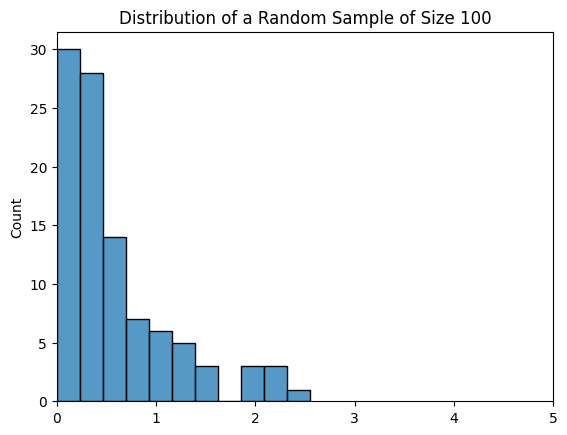

In [3]:
def random_sample(size):
    observations = np.empty(size)
    for i in range(size):
        observation = my_expon.rvs()
        observations[i] = observation
    return observations

random_sample_100 = random_sample(100)
print(f"Random sample of size 100: {random_sample_100}")
sns.histplot(random_sample_100)
plt.title('Distribution of a Random Sample of Size 100')
plt.xlim(0,5);

As expected in accordance with the population density, values closer to 0 are more likely than values farther from 0 to be drawn in the random sample.

If we used this random sample to form our estimate for the population scale parameter, our estimate (the sample mean) would be as follows:

In [4]:
print(f"Sample mean: {np.mean(random_sample_100):2f}")

Sample mean: 0.597461


You'll notice this estimate is close, but not exactly equal to the actual scale parameter, 0.5.

In [5]:
new_random_sample_100 = random_sample(100)
print(f"Sample mean: {np.mean(new_random_sample_100):2f}")

Sample mean: 0.397555


And if we use a different random sample, we get a different close, but not exact estimate.

Sometimes our estimate is above the actual value, and sometimes it is below. Sometimes it is closer to the true value and sometimes it is farther. This process is due to chance.

So, if we calculate an estimate not knowing the actual population parameter, how do we know which category it fits into? Actually, we cannot. But, we can quantify this uncertainty.

I mentioned where the estimate falls in relation to the true value is due to chance. Probability is the study of quantifying this chance precisely. We can actually quantify this process very precisely. The question is: what is the probability of the estimate falling above or below, far or close, to the actual value? Let's use a Monte Carlo simulation to see what this probability distribution looks like.

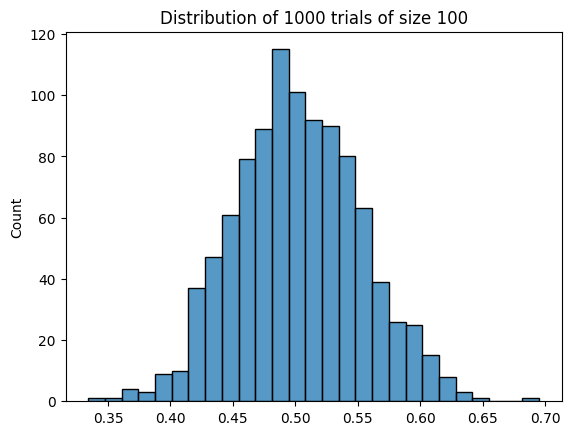

In [6]:
population_mean = my_scale
population_std = my_scale
rep = 1000
sample_size = 100
trials = np.empty(rep)
for i in range(rep):
    sample_mean = np.mean(random_sample(sample_size))
    trials[i] = sample_mean

sns.histplot(trials)
plt.title(f'Distribution of {rep} trials of size {sample_size}');

You'll notice this distribution looks approximately normal. Estimates farther from the true value are less likely, and the distribution is approximately symmetric about the true value. This leads us to the central limit theorem, the most celebrated finding in statistics. It is the most celebrated finding precisely because it is the link that allows us to back claims about the population from a sample with precision. We will see why this is soon.

**Central Limit Theorem**

Let $X_1, X_2, ... , X_n \sim f(x)$ with $\mu$ and $\sigma^2$ equal to the population mean and variance, respectively

Let $\bar{X}_n = \frac{1}{n}\sum_{i=1}^{n} X_i$

If the population variance is finite, 

Then as n approaches infinity, the distribution of the sample mean converges to $N(\mu, \frac{\sigma^2}{n})$

Another way to state this is $\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma}$ converges to a standard normal distribution.

$\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma}$ if the normalized sample mean and we often say it is approximately a standard normal distribution if n is "sufficiently large".

### Sample → Population

You may have noticed that as a continous parameter, the chance of the sample mean being equal to the population mean is near 0. If our goal is to form a claim with a chance at being correct, our estimate must be a range of values. We need to use our sample to form a lower bound and an upper bound. What is the process of forming a claim, where it is guaranteed to be right a fixed proportion of the time?

Essentially, we want two functions of our random sample, such that the probability that the lower bound is less than the true value and the upper bound is greater than the true value follows our chosen value.

In other words:

Let $\hat{\theta}_L$ be our lower bound and $\hat{\theta}_U$ be our upper bound

$P(\hat{\theta}_L < \mu, \hat{\theta}_U > \mu) = 1 - \alpha$

Which statistics $\hat{\theta}_L$ and $\hat{\theta}_U$ guarantee this? Here's where our central limit theorem comes in.

Because the normalized sample mean follows a known distribution, an approximate standard normal distribution, we can set bounds for the statistic corresponding to a desired confidence level.

$P(Z > -z_{\alpha/2}, Z < z_{\alpha/2}) = 1 - \alpha$

$P(\frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} > -z_{\alpha/2}, \frac{\sqrt{n}(\bar{X}_n - \mu)}{\sigma} < z_{\alpha/2}) = 1 - \alpha$

Because the normalized sample mean is a function of our parameter of interest, for any given sample, we can solve for the set of values of $\mu$ that allow the normalized sample mean to fall within these bounds.
Algebraically,

$P(\bar{X}_n - \frac{z_{\alpha/2}\,\sigma}{\sqrt{n}} < \mu, \bar{X}_n + \frac{z_{\alpha/2}\,\sigma}{\sqrt{n}} > \mu) = 1 - \alpha$

Thus: $\hat{\theta}_L = \bar{X}_n - \frac{z_{\alpha/2}\,\sigma}{\sqrt{n}}$ and $\hat{\theta}_U = \bar{X}_n + \frac{z_{\alpha/2}\,\sigma}{\sqrt{n}}$

⭐ *In sum: knowing how the sample mean behaves through the central limit theorem allows us to determine what values of the parameter are plausible given a particular sample.*

The following code calculates a confidence interval using the formula we just derived. (Note: since we don't know the population variance, we will use the sample variance as it converges in probability to the population variance, and thus when used to normalize the sample mean, still converges in distribution to a standard normal)

In [7]:
alpha = 0.05
sample_size = 100
confidence_level = 1 - alpha
our_random_sample = random_sample(sample_size)
our_sample_mean = np.mean(our_random_sample)
our_sample_std = np.std(our_random_sample, ddof=1)

from scipy.stats import norm
z = norm(loc = 0, scale = 1)
z_score = z.ppf(1 - alpha/2)
standard_error = our_sample_std / math.sqrt(sample_size)
confidence_interval = (our_sample_mean - (z_score * standard_error), our_sample_mean + (z_score * standard_error))
print(f"At a {round(confidence_level * 100)}% confidence level, the population mean is estimated to be between {confidence_interval[0]:.2f} and {confidence_interval[1]:.2f}.")

At a 95% confidence level, the population mean is estimated to be between 0.39 and 0.59.


Finally, to demonstrate that our process does in fact ensure our claims are correct a fixed proportion of the time, we will simulate what proportion of 95% confidence intervals capture the true value of the parameter of interest.

In [8]:
def create_confidence_interval(alpha, sample_size):
    confidence_level = 1 - alpha
    our_random_sample = random_sample(sample_size)
    our_sample_mean = np.mean(our_random_sample)
    our_sample_std = np.std(our_random_sample, ddof=1)
    z = norm(loc = 0, scale = 1)
    z_score = z.ppf(1 - alpha/2)
    standard_error = our_sample_std / math.sqrt(sample_size)
    confidence_interval = (our_sample_mean - (z_score * standard_error), our_sample_mean + (z_score * standard_error))
    return confidence_interval

total=1000
success = 0
alpha = 0.05
sample_size = 100
for i in range(total):
    one_confidence_interval = create_confidence_interval(alpha, sample_size)
    if population_mean >= one_confidence_interval[0] and population_mean <= one_confidence_interval[1]:
        success += 1
proportion = success/total
proportion

0.933

### Reflection
This project was inspired by what I learned in my statistics class last quarter. This class taught frequentist, parametric statistics. Working on this project was a lot more difficult that I expected. It also made me realize I struggle with perfectionism, and that it's holding me back in many aspects of life. I've decided one of my main goals to work on at the moment is perfectionism. In addition to undergoing much polishing of the whole notebook, I would have preferred if my simulation was tied to a real-world example. However, in alignment with combatting perfectionism, I've decided it's complete as is and to publish it.